In [1]:
import json
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# %pip install seaborn
# %pip install tensorflow


- label: This feature indicates whether the file is labeled as benign (False) or malicious (True).
- .textsize: This feature represents the size of the .text section in the PE file.
- .textentropy: This feature represents the entropy of the .text section in the PE file.
- .textvsize: This feature represents the virtual size of the .text section in the PE file.
- .datasize: This feature represents the size of the .data section in the PE file.
- .dataentropy: This feature represents the entropy of the .data section in the PE file.
- .datavsize: This feature represents the virtual size of the .data section in the PE file.
- .rsrcsize: This feature represents the size of the .rsrc section in the PE file.
- .rsrcentropy: This feature represents the entropy of the .rsrc section in the PE file.
- .rsrcvsize: This feature represents the virtual size of the .rsrc section in the PE file.
- machine: This feature represents the type of machine for which the file is intended.
- subsystem: This feature represents the target subsystem for the PE file.
- generalsize: This feature represents the size of the general file information in the PE header.
- generalvsize: This feature represents the virtual size of the general file information in the PE header.
- generalhas_debug: This feature indicates whether the PE file has a debug section (True) or not (False).
- generalexports: This feature represents the number of exported functions in the PE file.
- generalimports: This feature represents the number of imported functions in the PE file.
- generalhas_relocations: This feature indicates whether the PE file has relocation information (True) or not (False).
- generalhas_resources: This feature indicates whether the PE file has resource information (True) or not (False).
- generalhas_signature: This feature indicates whether the PE file has a digital signature (True) or not (False).
- generalhas_tls: This feature indicates whether the PE file has thread local storage (TLS) information (True) or not (False).
- generalsymbols: This feature represents the number of symbols in the PE file.
- stringsnumstrings: This feature represents the number of printable strings in the PE file.
- stringsavlength: This feature represents the average length of the printable strings in the PE file.
- stringsprintabledist: This feature represents the histogram of printable characters within the printable strings.
- stringsprintables: This feature indicates whether the PE file contains printable strings (True) or not (False).
- stringsentropy: This feature represents the entropy of characters across all printable strings.
- stringspaths: This feature represents the number of strings that begin with "C:\" indicating paths.
- stringsurls: This feature represents the number of strings that contain "http://" or "https://" indicating URLs.
- stringsregistry: This feature represents the number of strings that contain "HKEY_" indicating registry keys.
- stringsMZ: This feature represents the number of strings that contain "MZ" indicating Windows PE droppers or bundled executables.
- cofftimestamp: This feature represents the timestamp in the COFF header of the PE file.
- coffmachine: This feature represents the target machine for which the PE file is intended.
- coffcharacteristics: This feature represents a list of image characteristics of the PE file.
- optionalsubsystem: This feature represents the target subsystem specified in the optional header of the PE file.
- optionaldll_characteristics: This feature represents a list of DLL characteristics of the PE file.
- optionalmagic: This feature represents the magic value in the optional header of the PE file.
- optionalmajor_image_version: This feature represents the major image version specified in the optional header of the PE file.
- optionalminor_image_version: This feature represents the minor image version specified in the optional header of the PE file.
- optionalmajor_linker_version: This feature represents the major linker version specified in the optional header of the PE file.
- optionalminor_linker_version: This feature represents the minor linker version specified in the optional header of the PE file.
- optionalmajor_operating_system_version: This feature represents the major operating system version specified in the optional header of the PE file.
- optionalminor_operating_system_version: This feature represents the minor operating system version specified in the optional header of the PE file.
- optionalmajor_subsystem_version: This feature represents the major subsystem version specified in the optional header of the PE file.
- optionalminor_subsystem_version: This feature represents the minor subsystem version specified in the optional header of the PE file.
- optionalsizeof_code: This feature represents the size of the code section specified in the optional header of the PE file.
- optionalsizeof_headers: This feature represents the size of the headers specified in the optional header of the PE file.
- optionalsizeof_heap_commit: This feature represents the size of the committed heap specified in the optional header of the PE file.


In [2]:
def load_dataset_from_jsonl(file_path):
    dataset = []
    
    for i in range(1,3):
        path= file_path + str(i) + '.jsonl'
        with open(path, 'r') as file:
            for line in file:
                data = json.loads(line)
                dataset.append(data)
    return dataset

file_path = '../dataset/ember2018/train_features_'

dataset = load_dataset_from_jsonl(file_path)



In [3]:
x=dataset[0]
print(json.dumps(x, indent=4, sort_keys=True))

{
    "appeared": "2018-01",
    "avclass": "sivis",
    "byteentropy": [
        24434,
        11,
        18,
        5,
        9,
        8,
        35,
        21,
        3,
        4,
        8,
        4,
        2,
        3,
        7,
        4,
        3921,
        32,
        41,
        22,
        21,
        4,
        15,
        7,
        22,
        0,
        0,
        4,
        0,
        0,
        4,
        3,
        7561,
        18,
        51,
        73,
        51,
        40,
        104,
        71,
        116,
        13,
        25,
        9,
        10,
        19,
        13,
        18,
        5508,
        58,
        71,
        53,
        75,
        49,
        86,
        58,
        39,
        15,
        9,
        16,
        20,
        9,
        10,
        68,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
     

In [50]:
# dataset[0]['section']['sections']
# dataset[0]['header']
# features['strings']
df['stringsprintabledist']

In [4]:

features= {}
features['label']=[]

def extract_features(feature, feature_name):
    global features
    
    for key, value in feature.items(): 
        
        string_name = feature_name + '' + key
        if string_name not in features:
            features[string_name]= []
        
        if isinstance(value, int) or isinstance(value, float):
            features[string_name].append(value)
        else:
            features[string_name].append(None)
    

section_names = ['.text', '.data', '.rsrc']
feature_names = ['size', 'entropy', 'vsize']

for section in section_names:
    for feature in feature_names:
        features[section + feature] = []

features['machine']=[]
features['subsystem']=[]


for data in dataset:
    
    if data['label'] == -1:
        continue

    #all sections should be equal to 1    
    section_count_list = {'.text':0, '.data':0, '.rsrc':0}
    for item in data['section']['sections']:
        
        if item['name'] in section_names:
            section_count_list[item['name']]+=1
    
    check = False
    for key,value in section_count_list.items():
        if value!=1:
            check=True
            break
    
    if check:
        continue
        
    feature_names = ['size', 'entropy', 'vsize']
        
    for item in data['section']['sections']:

        if item['name'] in section_names:
            
            for feature in feature_names:
                val = item[feature] if item[feature]!=None else None
                features[item['name'] + feature].append(val)
    
    feature_names = ['general', 'strings']

    for feature in feature_names:
        extract_features(data[feature], feature)

    for item in data['header']:
        extract_features(data['header'][item], item)
    
    features['machine'].append(data['header']['coff']['machine'])
    features['subsystem'].append(data['header']['optional']['subsystem'])
    
    
    features['label'].append(data['label'])

df = pd.DataFrame(features)
print(df['label'].value_counts())


label
0    59011
1    53695
Name: count, dtype: int64


In [5]:
print(df.isnull().any())

label                                     False
.textsize                                 False
.textentropy                              False
.textvsize                                False
.datasize                                 False
.dataentropy                              False
.datavsize                                False
.rsrcsize                                 False
.rsrcentropy                              False
.rsrcvsize                                False
machine                                   False
subsystem                                 False
generalsize                               False
generalvsize                              False
generalhas_debug                          False
generalexports                            False
generalimports                            False
generalhas_relocations                    False
generalhas_resources                      False
generalhas_signature                      False
generalhas_tls                          

In [6]:
df.dropna(how='all', axis=1, inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112706 entries, 0 to 112705
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   label                                   112706 non-null  int64  
 1   .textsize                               112706 non-null  int64  
 2   .textentropy                            112706 non-null  float64
 3   .textvsize                              112706 non-null  int64  
 4   .datasize                               112706 non-null  int64  
 5   .dataentropy                            112706 non-null  float64
 6   .datavsize                              112706 non-null  int64  
 7   .rsrcsize                               112706 non-null  int64  
 8   .rsrcentropy                            112706 non-null  float64
 9   .rsrcvsize                              112706 non-null  int64  
 10  machine                                 1127

In [16]:
df['machine'].unique()

array([ 4,  1,  8,  0,  3,  7,  6,  9,  2,  5, 10])

In [14]:

columns_to_encode = ['machine', 'subsystem']

for column in columns_to_encode:

    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112706 entries, 0 to 112705
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   label                                   112706 non-null  int64  
 1   .textsize                               112706 non-null  int64  
 2   .textentropy                            112706 non-null  float64
 3   .textvsize                              112706 non-null  int64  
 4   .datasize                               112706 non-null  int64  
 5   .dataentropy                            112706 non-null  float64
 6   .datavsize                              112706 non-null  int64  
 7   .rsrcsize                               112706 non-null  int64  
 8   .rsrcentropy                            112706 non-null  float64
 9   .rsrcvsize                              112706 non-null  int64  
 10  machine                                 1127

In [17]:
print(df.var())

label                                     2.494460e-01
.textsize                                 2.954660e+12
.textentropy                              9.128005e-01
.textvsize                                3.090359e+12
.datasize                                 2.039652e+11
.dataentropy                              3.802228e+00
.datavsize                                4.391297e+13
.rsrcsize                                 1.963697e+13
.rsrcentropy                              3.099700e+00
.rsrcvsize                                2.010150e+13
machine                                   7.113623e-01
subsystem                                 1.929407e-01
generalsize                               5.488090e+13
generalvsize                              1.084039e+14
generalhas_debug                          2.498408e-01
generalexports                            3.671667e+05
generalimports                            7.020521e+04
generalhas_relocations                    2.473448e-01
generalhas

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
for column in df.columns:
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [19]:
# Columns to exclude from standardization
exclude_columns= [
"machine", "subsystem", "label"
]

df_standardized = df.copy()

scaler = StandardScaler()

for column in df.columns:
    if column not in exclude_columns:
        # Standardize the column
        df_standardized[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

print(df_standardized)

        label  .textsize  .textentropy  .textvsize  .datasize  .dataentropy   
0           1  -0.368733     -0.136414   -0.371799  -0.150483      0.583186  \
1           0  -0.312437      0.374984   -0.316897  -0.099467     -0.179728   
2           1  -0.220099      0.333584   -0.226520  -0.138013      0.360913   
3           0  -0.273714      0.416563   -0.279120  -0.141414      0.108031   
4           0  -0.209673      0.361249   -0.216470  -0.147082     -0.218496   
...       ...        ...           ...         ...        ...           ...   
112701      0   1.668062      0.132132    1.619748   0.039977      1.571817   
112702      1  -0.339840      0.286440   -0.343489  -0.140280     -0.805106   
112703      0   0.188273      0.210924    0.172875  -0.131210      0.593290   
112704      0  -0.371712     -1.064738   -0.374910  -0.153884     -1.536665   
112705      0  -0.339244      0.334660   -0.343040  -0.144815     -0.673018   

        .datavsize  .rsrcsize  .rsrcentropy  .rsrcv

In [3]:
df_standardized.to_csv('ember_data.csv')

NameError: name 'df_standardized' is not defined

In [22]:
df.to_csv('ember_data_unfiltered.csv')

In [20]:
print(df_standardized['label'].nunique())

2


# Load from CSV

In [3]:
#load from csv to df
df = pd.read_csv('ember_data_unfiltered.csv')
df_standardized = pd.read_csv('ember_data.csv')
df.drop('index',inplace=True,axis=1)
df_standardized.drop('index',inplace=True,axis=1)

In [4]:
df.head()
#downsample the df to 10000 rows
df_standardized = df_standardized.sample(n=10000, random_state=42)

In [5]:
y = df_standardized['label']

X = df_standardized.drop('label', axis=1)


In [6]:
# Get the count of each unique value
value_counts = y.value_counts()

# Retrieve the count of the specific value
c1 = value_counts.get(1, 0)
c2 = value_counts.get(0, 0)

# Print the result
print("Count of", 1, "in column:", c1, c2)


Count of 1 in column: 4727 5273


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# X_train.shape, y_train.shape
y_train.value_counts()

label
0    4172
1    3828
Name: count, dtype: int64

# Random Forest Classifier  

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
rf = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(criterion='entropy', n_jobs=2, random_state=42,
                       verbose=1, warm_start=True)

In [10]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9295


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [11]:
# # print confusion matrix
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
  

# Model 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

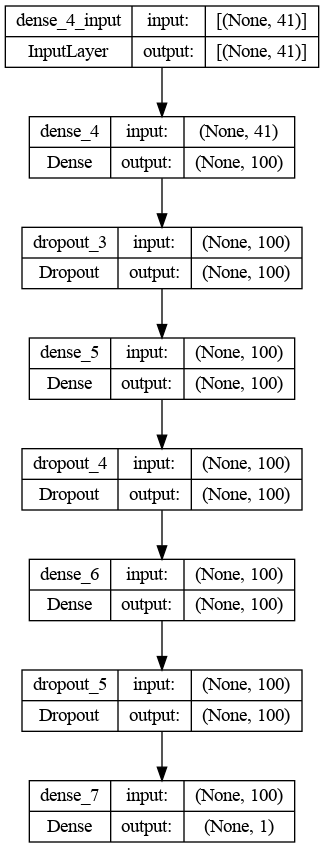

In [25]:
# write a ann model to classify 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras import backend as K
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=41, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model
  
# def get_model2():
#     model = Sequential()
#     model.add(Dense(100, input_dim=2381, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(Dropout(0.5))
#     model.add(Dense(2, activation='softmax'))
#     return model
  
model = get_model()
# model2 = get_model2()

print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)






# Compile and Test


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#validation accuracy chart



history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)



Epoch 1/50
63/63 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.8306 - val_loss: 0.4182 - val_accuracy: 0.8585
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.8326 - val_loss: 0.4235 - val_accuracy: 0.8595
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.8354 - val_loss: 0.4268 - val_accuracy: 0.8650
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8393 - val_loss: 0.4226 - val_accuracy: 0.8605
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8409 - val_loss: 0.4237 - val_accuracy: 0.8530
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8339 - val_loss: 0.4156 - val_accuracy: 0.8650
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.8374 - val_loss: 0.4246 - val_accuracy: 0.8560
Epoch 8/50
63/63 [==

In [27]:

# save model
model.save('model/ember_model.h5')

In [28]:
# predit
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)
# y_test = np.argmax(y_test, axis=1)

# accuracy
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))


63/63 [==============================] - 0s 796us/step


In [29]:
# zer=0
# for x in y_pred:
#     if x==0:
#         zer+=1
# print(zer)
# print(len(y_pred))

# rounded = [inyt(round(x[0])) for x in predictions]
# print(rounded)
y_pred_read = [int(round(x[0])) for x in y_pred]
y_pred_read = np.array(y_pred_read)
# y_pred_read.value_counts()
#give unique values with count in y_pred_read
unique, counts = np.unique(y_pred_read, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1080]
 [   1  920]]


In [30]:
y_test.value_counts()

label
0    1101
1     899
Name: count, dtype: int64

In [31]:
y_test.shape, y_pred.shape,y_pred_read.shape

((2000,), (2000, 1), (2000,))

In [32]:
# find accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_read)

0.8505

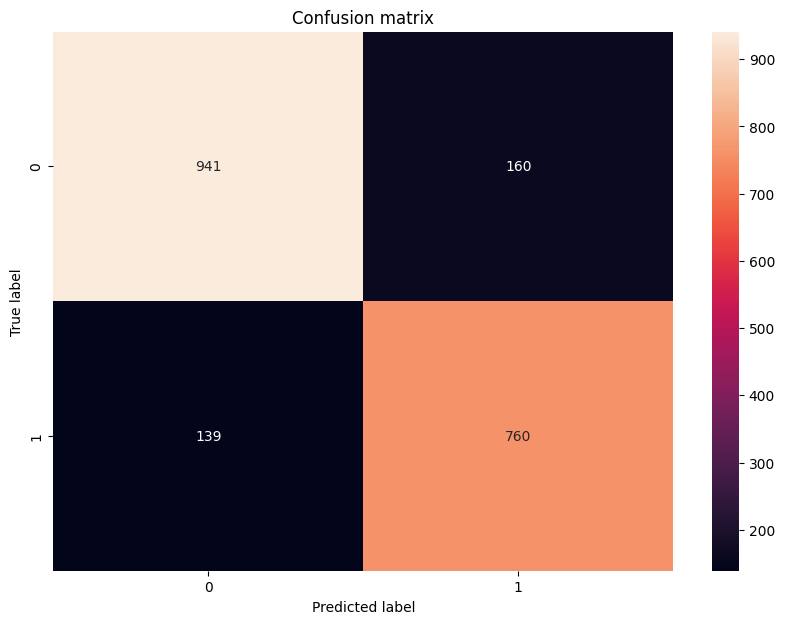

In [33]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_read, labels=[0, 1], title='Confusion matrix')

# Default Validation

In [39]:
print(type (model.history.history))

<class 'dict'>


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


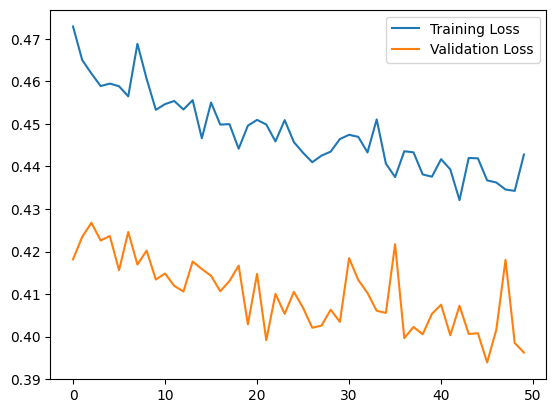

In [41]:

#get training loss
print(history.history.keys())
train_loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']
#plot graph
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


In [37]:

#get training loss
print(model.history.history.keys())
train_loss = model.history.history['loss']
#get validation loss
val_loss = model.history.history['val_loss']
#plot graph
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


KeyError: 'loss'

# K Fold Validation